 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [99]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [100]:
# Reading whale returns
whalecsvpath='whale_returns.csv'
whale_returns=pd.read_csv((whalecsvpath), index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns.sort_index(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [101]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [102]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [103]:
# Reading algorithmic returns
algopath='algo_returns.csv'
algo_returns = pd.read_csv((algopath), index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns.sort_index(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [104]:
# Count nulls
algo_returns.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [105]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [106]:
# Reading S&P 500 Closing Prices
sppath='sp500_history.csv'
sp500=pd.read_csv((sppath), index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500.sort_index(inplace=True)
sp500.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [107]:
# Check Data Types
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [108]:
# Fix Data Types
sp500['Close'] = sp500['Close'].str.replace('$', '')
sp500 = sp500.astype({'Close': float})
sp500.head()

C:\Users\brand\AppData\Local\Temp/ipykernel_3412/2913890715.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500['Close'] = sp500['Close'].str.replace('$', '')


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [109]:
# Calculate Daily Returns ()
sp500_returns = sp500.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [110]:
# Drop nulls
sp500_returns = sp500_returns.dropna()
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [111]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={'Close':'S&P500'})
sp500_returns

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [112]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
combined_df = combined_df.dropna()
combined_df = combined_df.rename(columns={'SOROS FUND MANAGEMENT LLC':'SOROS'})
combined_df = combined_df.rename(columns={'PAULSON & CO.INC.':'PAULSON'})
combined_df = combined_df.rename(columns={'TIGER GLOBAL MANAGEMENT LLC':'TIGER'})
combined_df = combined_df.rename(columns={'BERKSHIRE HATHAWAY INC':'BERKSHIRE'})
combined_df.shape
combined_df.head()

,SOROS,PAULSON & CO.INC.,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

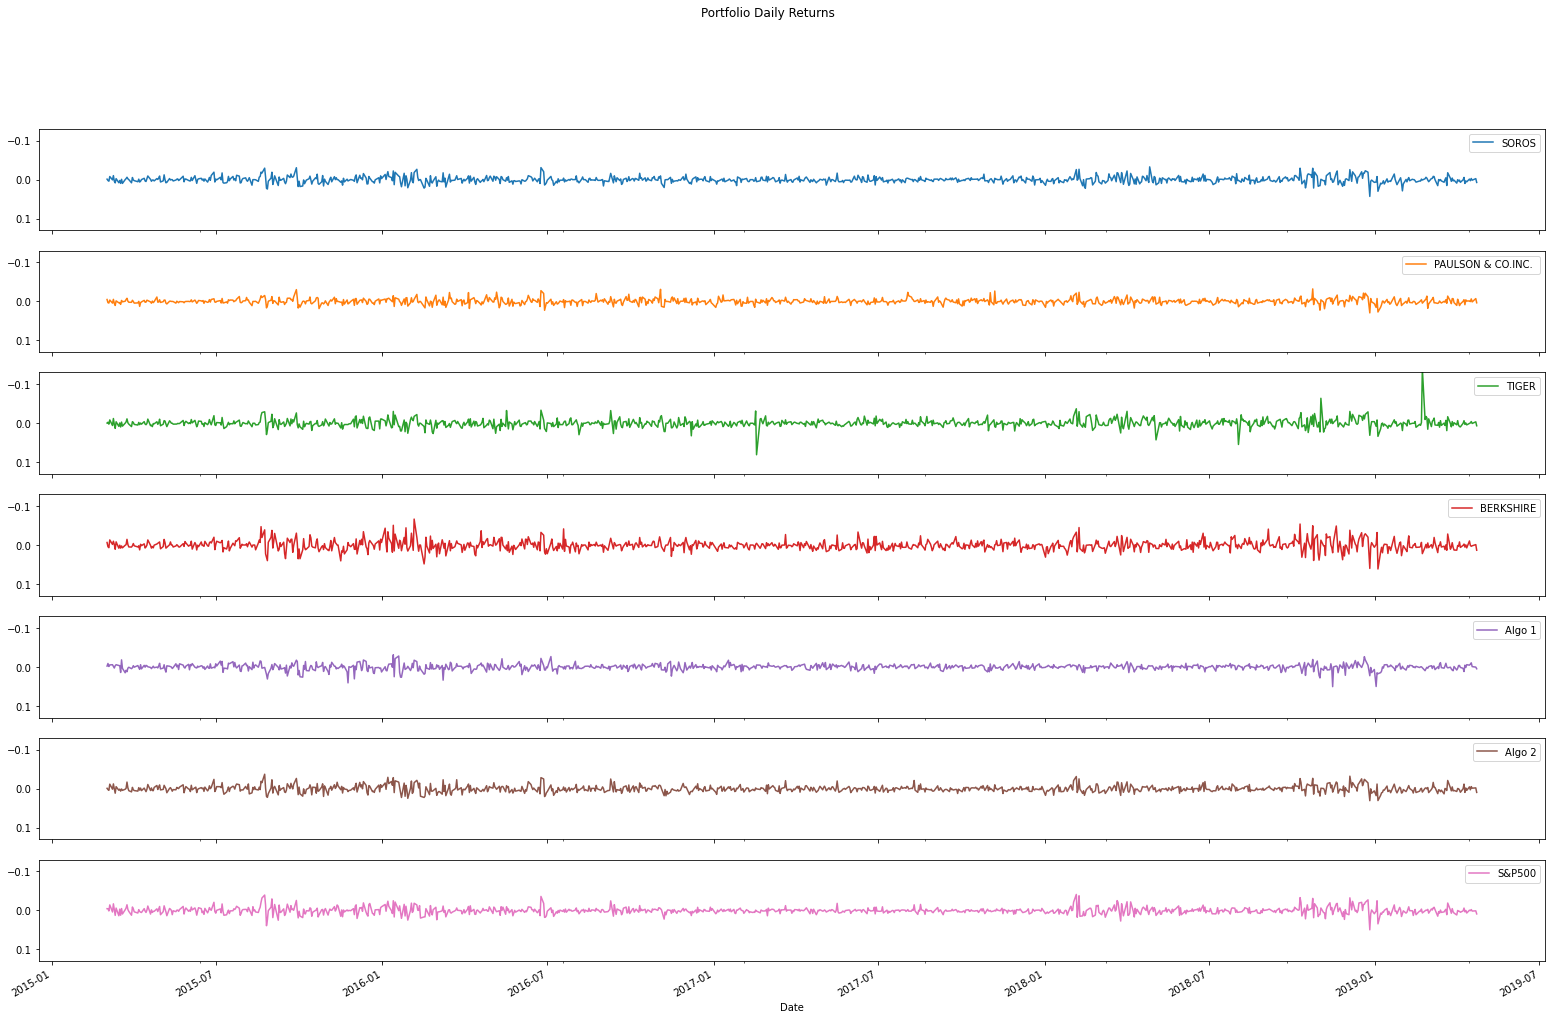

In [113]:
# Plot daily returns of all portfolios
combined_df.plot(kind = 'line', figsize = (27, 17), subplots = True, ylim = (.13,-.13), title = 'Portfolio Daily Returns')

#### Calculate and Plot cumulative returns.

In [114]:
# Calculate cumulative returns of all portfolios
cumulative_returns=(1+combined_df).cumprod()
cumulative_returns.head()

,SOROS,PAULSON & CO.INC.,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


<AxesSubplot:title={'center':'Cumulative Returns Comparison'}, xlabel='Date'>

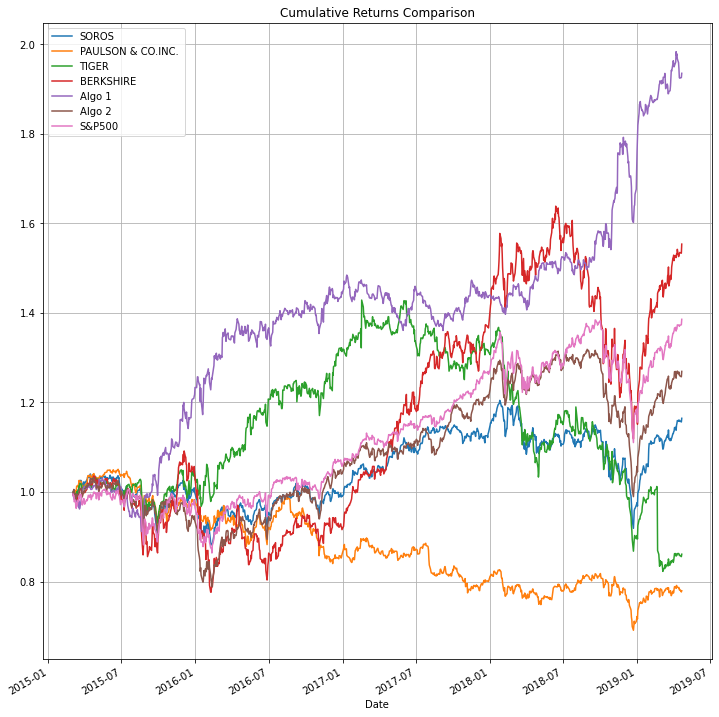

In [115]:
# Plot cumulative 
cumulative_returns.plot(kind='line', figsize=(12,13), title="Cumulative Returns Comparison", grid=True)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

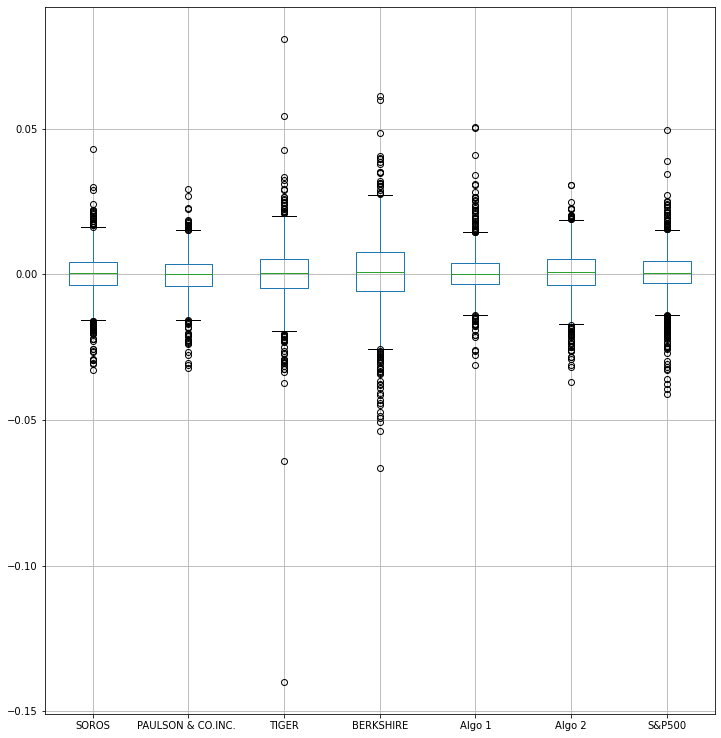

In [116]:
# Box plot to visually show risk
combined_df.boxplot(figsize='12,13')

### Calculate Standard Deviations

In [117]:
# Calculate the daily standard deviations of all portfolios
combined_std=combined_df.std()
combined_std

SOROS                 0.007895
PAULSON & CO.INC.     0.007023
TIGER                 0.010894
BERKSHIRE             0.012919
Algo 1                0.007620
Algo 2                0.008342
S&P500                0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [118]:
# Calculate  the daily standard deviation of S&P 500
sp500_std=sp500_returns.dropna().std()
sp500_std

S&P500    0.008111
dtype: float64

In [119]:
# Determine which portfolios are riskier than the S&P 500
risk_against_sp500 = combined_std.ge(sp500_std, level='S&P500', fill_value= sp500_std)
risk_against_sp500 = risk_against_sp500.to_frame()
risk_against_sp500.drop(index=('S&P500'), inplace = True)
risk_against_sp500 = risk_against_sp500.rename(columns={0:'Risky?'})

print(risk_against_sp500)
print(f"Porfolios that are riskier than the S&P 500's deviation of .008135: {risk_against_sp500.index[risk_against_sp500['Risky?']==True].tolist()}")

                    Risky?
Algo 1               False
Algo 2                True
BERKSHIRE             True
PAULSON & CO.INC.    False
SOROS                False
TIGER                 True
Porfolios that are riskier than the S&P 500's deviation of .008135: ['Algo 2', 'BERKSHIRE', 'TIGER']


### Calculate the Annualized Standard Deviation

In [120]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_std*np.sqrt(252)
annual_std

SOROS                 0.125335
PAULSON & CO.INC.     0.111488
TIGER                 0.172936
BERKSHIRE             0.205077
Algo 1                0.120967
Algo 2                0.132430
S&P500                0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [121]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_21 = combined_df.rolling(window=21).std().dropna()
combined_21

,SOROS,PAULSON & CO.INC.,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.009105
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.009095
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.009114
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.009246
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.008707
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


<AxesSubplot:xlabel='Date'>

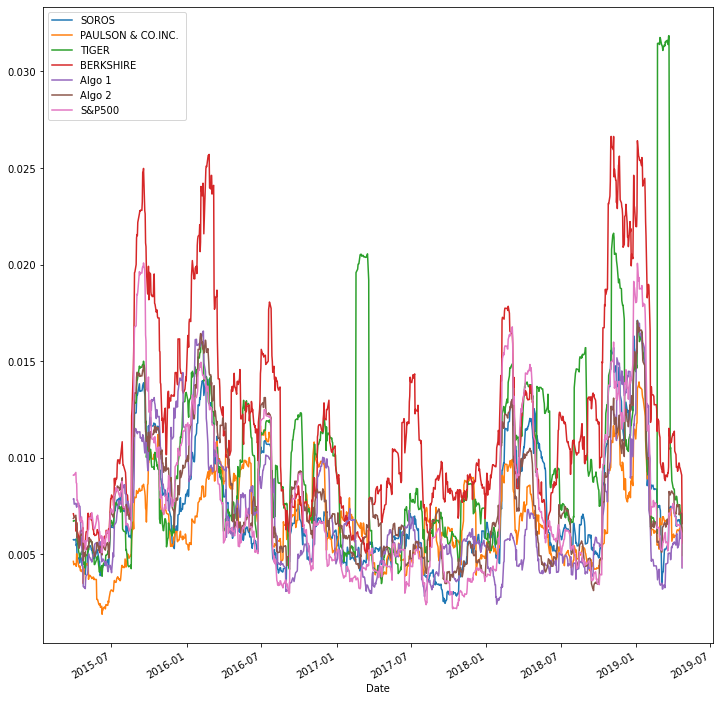

In [122]:
#plot the rolling standard deviation
combined_21.plot(figsize=(12,13))

### Calculate and plot the correlation

In [123]:
# Calculate the correlation
combined_corr=combined_21.corr()
# Display the correlation matrix
combined_corr

,SOROS,PAULSON & CO.INC.,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P500
SOROS,1.000000,0.664590,0.451969,0.859187,0.721356,0.872922,0.911914
PAULSON & CO.INC.,0.664590,1.000000,0.407927,0.631215,0.585584,0.688595,0.597760
TIGER,0.451969,0.407927,1.000000,0.413311,0.265667,0.359691,0.414108
BERKSHIRE,0.859187,0.631215,0.413311,1.000000,0.794022,0.824877,0.812766
Algo 1,0.721356,0.585584,0.265667,0.794022,1.000000,0.760948,0.699671
Algo 2,0.872922,0.688595,0.359691,0.824877,0.760948,1.000000,0.901190
S&P500,0.911914,0.597760,0.414108,0.812766,0.699671,0.901190,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [124]:
# Calculate covariance of a single portfolio
algo1_cov=combined_df['Algo 1'].cov(combined_df['S&P500'])
algo1_cov

1.8217749991632744e-05

In [125]:
# Calculate variance of S&P 500
sp_variance=combined_df['S&P500'].var()
sp_variance

7.316632424648712e-05

In [126]:
# Computing beta
algo_beta=algo1_cov/sp_variance
algo_beta

0.24899091459425637

<AxesSubplot:title={'center':'30-Day Rolling Beta: Algo 1'}, xlabel='Date'>

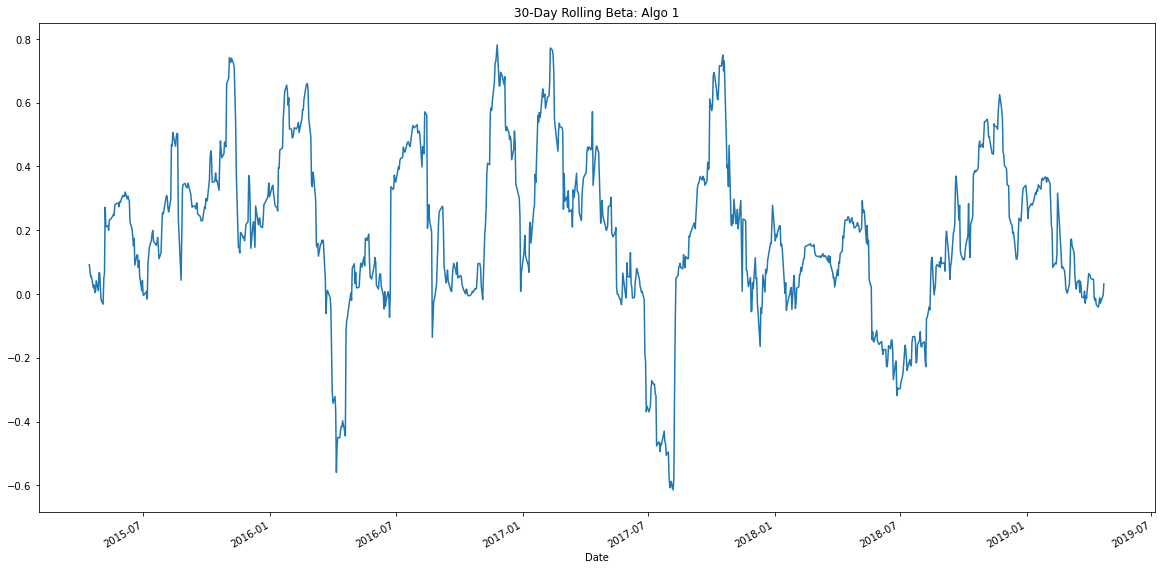

In [127]:
# Plot beta trend
rolling_covariance=combined_df['Algo 1'].rolling(window=30).cov(combined_df['S&P500'])
rolling_variance=combined_df['S&P500'].rolling(window=30).var()
rolling_beta=rolling_covariance/rolling_variance
rolling_beta.plot(figsize=(20,10), title="30-Day Rolling Beta: Algo 1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

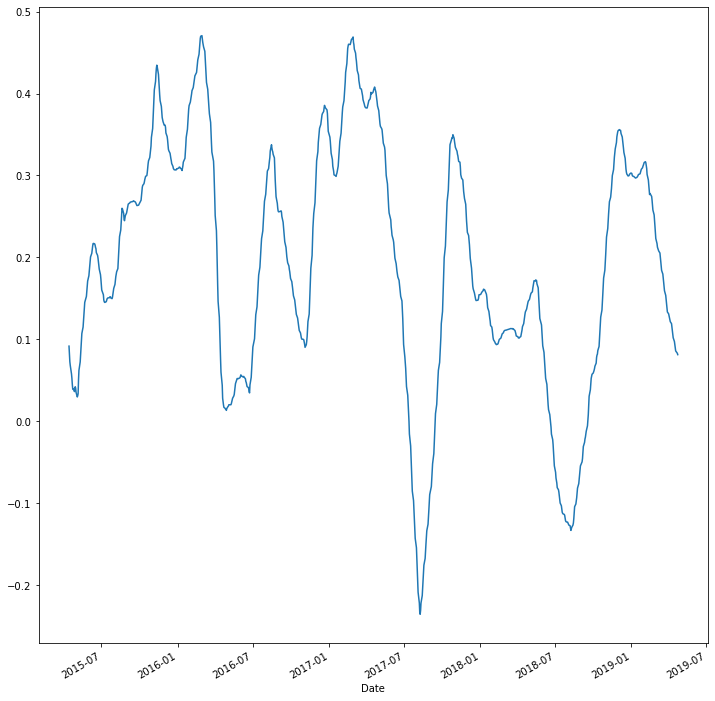

In [128]:
# Use `ewm` to calculate the rolling window
Algo_1_ewm=rolling_beta.ewm(halflife=21).mean()
Algo_1_ewm.plot(figsize=(12,13))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [129]:
# Annualized Sharpe Ratios
rf_rate=(1+0.000168+.000264)-1
sharpe_ratio=((combined_df.mean()-rf_rate)*252/(combined_df.std()*np.sqrt(252)))
sharpe_ratio

SOROS                -0.512166
PAULSON & CO.INC.    -1.460034
TIGER                -0.750563
BERKSHIRE             0.090965
Algo 1                0.478700
Algo 2               -0.320689
S&P500               -0.153463
dtype: float64

<AxesSubplot:>

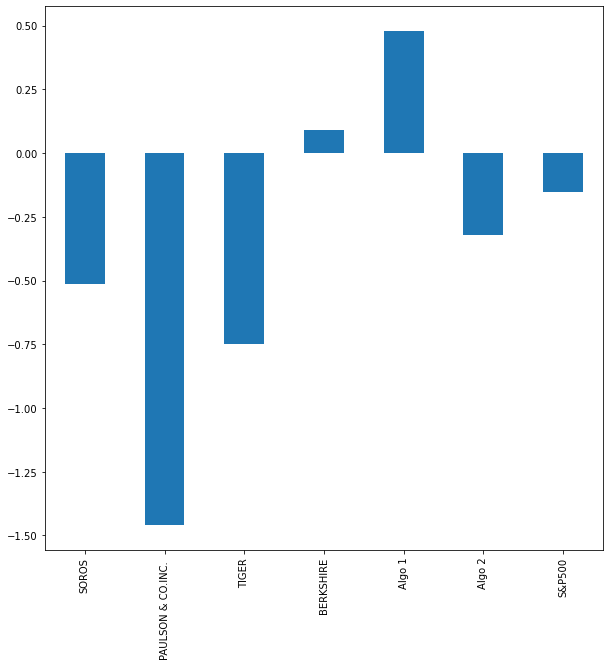

In [130]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = 'bar', figsize = (10,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Based on the Sharpe Ratios calculated above, the best performing potfolio is the Algorithm 1 portfolio returning a ratio of .469!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [131]:
# Reading data from 1st stock
goog_csvpath='goog_historical.csv'
goog_df=pd.read_csv((goog_csvpath), index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_df=goog_df.rename(columns={'NOCP':'Google Close'})
goog_df=goog_df.rename(columns={'Symbol':'GOOG'})
goog_df.head()

,GOOG,Google Close
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [132]:
# Reading data from 2nd stock
aapl_csvpath='aapl_historical.csv'
aapl_df=pd.read_csv((aapl_csvpath), index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_df=aapl_df.rename(columns={'NOCP':'Apple Close'})
aapl_df=aapl_df.rename(columns={'Symbol':'AAPL'})
aapl_df.head()

,AAPL,Apple Close
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [133]:
# Reading data from 3rd stock
cost_csvpath='cost_historical.csv'
cost_df=pd.read_csv((cost_csvpath), index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_df=cost_df.rename(columns={'NOCP':'Costco Close'})
cost_df=cost_df.rename(columns={'Symbol':'COST'})
cost_df.head()

,COST,Costco Close
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [134]:
# Combine all stocks in a single DataFrame
combined_custom_df = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join='inner')
combined_custom_df

,GOOG,Google Close,AAPL,Apple Close,COST,Costco Close
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48


In [135]:
# Reset Date index

In [136]:
# Reorganize portfolio data by having a column per symbol
combined_custom_df.drop(columns=['GOOG', 'AAPL', 'COST'], inplace=True)
combined_custom_df

,Google Close,Apple Close,Costco Close
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [137]:
# Calculate daily returns and Drop NAs
combined_daily=combined_custom_df.pct_change().dropna()

# Display sample data
combined_daily

,Google Close,Apple Close,Costco Close
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890
...,...,...,...
2018-05-17,0.011469,0.003650,0.003217
2018-05-16,0.002948,0.006364,-0.004459
2018-05-15,-0.002348,-0.009246,-0.016255


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [138]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns=combined_daily.dot(weights)
# Display sample data
portfolio_returns

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
                ...   
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
2018-05-11   -0.000012
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [139]:
# Join your returns DataFrame to the original returns DataFrame
all_returns_df=pd.concat([portfolio_returns, combined_df], axis="columns", join="inner")
all_returns_df=all_returns_df.rename(columns={0:'Custom'})
all_returns_df=all_returns_df.drop(index='2018-05-14')
all_returns_df

,Custom,SOROS,PAULSON & CO.INC.,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P500
2019-04-23,-0.000415,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
...,...,...,...,...,...,...,...,...
2018-05-18,-0.007529,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842


In [140]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_df=all_returns_df.dropna()
all_returns_df

,Custom,SOROS,PAULSON & CO.INC.,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P500
2019-04-23,-0.000415,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
...,...,...,...,...,...,...,...,...
2018-05-18,-0.007529,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [141]:
# Calculate the annualized `std`
all_std=all_returns_df.dropna().std()
all_std

Custom                0.013408
SOROS                 0.009245
PAULSON & CO.INC.     0.007354
TIGER                 0.014650
BERKSHIRE             0.015572
Algo 1                0.008423
Algo 2                0.008791
S&P500                0.009579
dtype: float64

### Calculate and plot rolling `std` with 21-day window

              Custom     SOROS  PAULSON & CO.INC.      TIGER  BERKSHIRE  \
2019-03-25  0.004927  0.004315            0.005695  0.004949   0.006602   
2019-03-22  0.005499  0.005915            0.006400  0.006197   0.009104   
2019-03-21  0.006570  0.006633            0.006303  0.007328   0.009475   
2019-03-20  0.007467  0.006773            0.006370  0.007574   0.009485   
2019-03-19  0.007651  0.006711            0.006224  0.007532   0.009731   
...              ...       ...                 ...       ...        ...   
2018-05-18  0.005613  0.005177            0.004569  0.009449   0.008564   
2018-05-17  0.005694  0.005206            0.004564  0.009359   0.008770   
2018-05-16  0.005724  0.005469            0.004659  0.009157   0.008457   
2018-05-15  0.005943  0.005402            0.004694  0.009156   0.008636   
2018-05-11  0.005859  0.005322            0.004663  0.009124   0.008475   

              Algo 1    Algo 2    S&P500  
2019-03-25  0.005889  0.005582  0.004325  
2019-03-22  0

<AxesSubplot:>

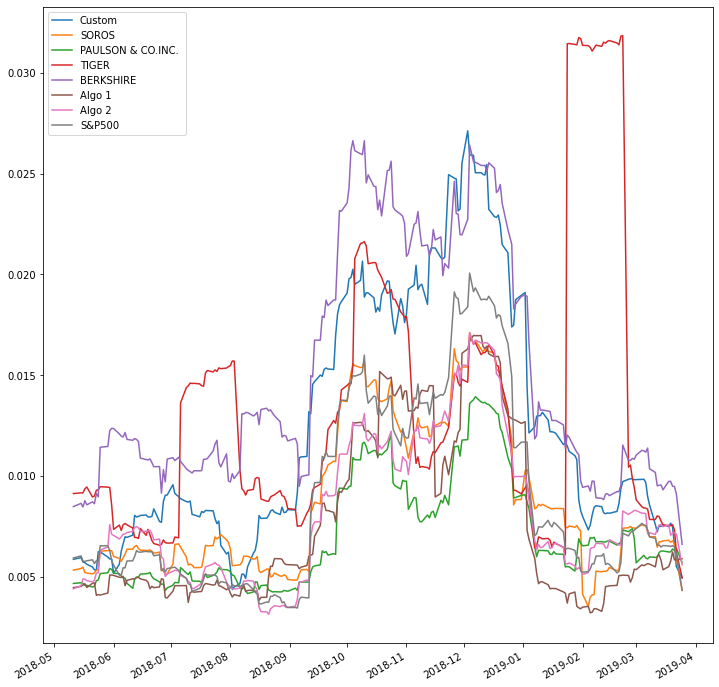

In [155]:
# Calculate rolling standard deviation
all_21 = all_returns_df.rolling(window=21).std().dropna()
print(all_21)
# Plot rolling standard deviation
all_21.plot(figsize=(12,13))

### Calculate and plot the correlation

In [154]:
# Calculate and plot the correlation
all_corr=all_returns_df.corr()
# Display the correlation matrix
all_corr

,Custom,SOROS,PAULSON & CO.INC.,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P500
Custom,1.000000,0.061622,0.025776,0.035875,0.006811,0.073443,0.039286,0.070700
SOROS,0.061622,1.000000,0.791191,0.477733,0.816671,0.337808,0.862338,0.876102
PAULSON & CO.INC.,0.025776,0.791191,1.000000,0.485430,0.650499,0.361242,0.783714,0.766705
TIGER,0.035875,0.477733,0.485430,1.000000,0.325086,0.114455,0.409455,0.481087
BERKSHIRE,0.006811,0.816671,0.650499,0.325086,1.000000,0.327042,0.782708,0.851975
Algo 1,0.073443,0.337808,0.361242,0.114455,0.327042,1.000000,0.365536,0.289296
Algo 2,0.039286,0.862338,0.783714,0.409455,0.782708,0.365536,1.000000,0.875723
S&P500,0.070700,0.876102,0.766705,0.481087,0.851975,0.289296,0.875723,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

 Custom Covariance: 9.080267369448284e-06
 S&P500 Variance: 9.17541613066218e-05
Custom Beta: 0.09896300331386682


<AxesSubplot:title={'center':'60-Day Rolling Beta: Custom Portfolio'}>

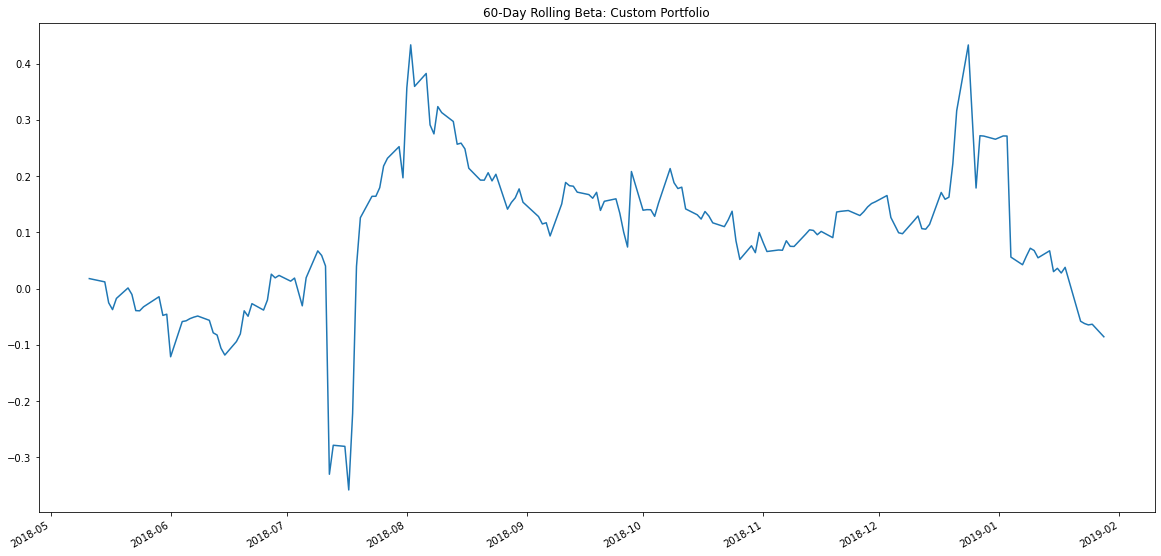

In [167]:
# Calculate and plot Beta
custom_cov=all_returns_df['Custom'].cov(all_returns_df['S&P500'])
sp_custom_var=all_returns_df['S&P500'].var()
custom_beta=custom_cov/sp_custom_var
print(f" Custom Covariance: {custom_cov}")
print(f" S&P500 Variance: {sp_custom_var}")
print(f"Custom Beta: {custom_beta}")

all_rolling_covariance=all_returns_df['Custom'].rolling(window=60).cov(all_returns_df['S&P500'])
all_rolling_variance=all_returns_df['S&P500'].rolling(window=60).var()
all_rolling_beta=all_rolling_covariance/all_rolling_variance
all_rolling_beta.plot(figsize=(20,10), title="60-Day Rolling Beta: Custom Portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [160]:
# Calculate Annualzied Sharpe Ratios
all_sharpe_ratio=((all_returns_df.mean()-rf_rate)*252/(all_returns_df.std()*np.sqrt(252)))
all_sharpe_ratio

Custom               -1.178960
SOROS                -0.345480
PAULSON & CO.INC.    -0.664897
TIGER                -1.490211
BERKSHIRE            -0.298411
Algo 1                1.216997
Algo 2               -0.709826
S&P500               -0.125369
dtype: float64

<AxesSubplot:>

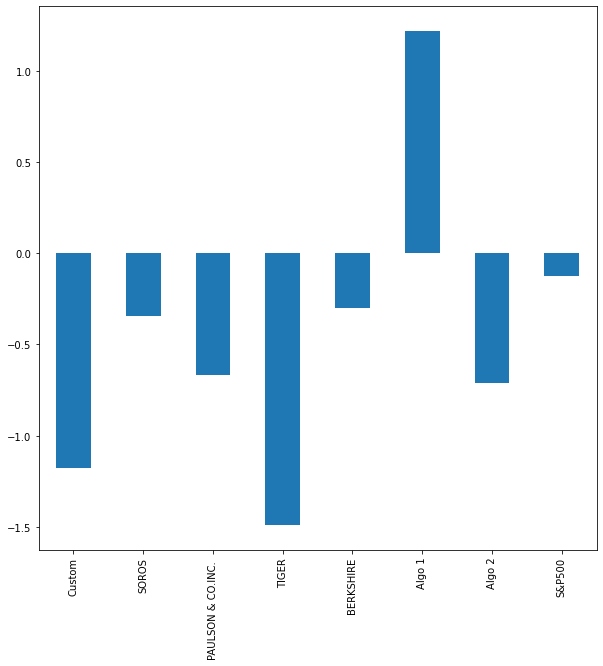

In [161]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratio.plot(kind = 'bar', figsize = (10,10))

### How does your portfolio do?

My custom porfolio of Google, Apple, and Costco was not a very strong porfolio compared to the other options.  Ringing in a Sharpe Ratio of -1.17 overall!